In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions

In [18]:
df =pd.read_csv('/content/concertriccir2.csv',header=None,names=["X","Y","Class"])

In [19]:
df.head()

,X,Y,Class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


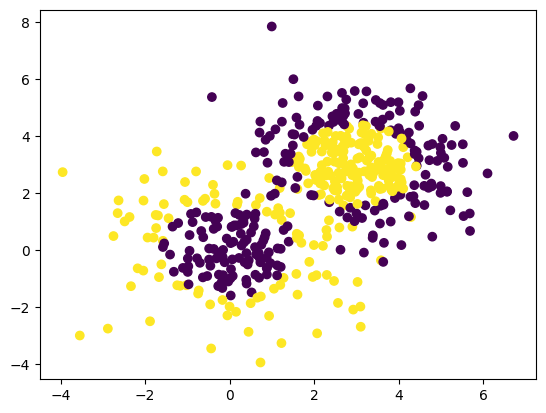

In [20]:
plt.scatter(df.X,df.Y,c=df['Class'])

In [21]:
X= df.iloc[:,0:2].values
y=df['Class'].values

In [22]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, BatchNormalization

In [23]:
m1 = Sequential()

m1.add(Dense(2,activation='relu',input_dim=2))
m1.add(Dense(2,activation='relu'))
m1.add(Dense(1,activation='sigmoid'))

m1.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_12 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [24]:
m1.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
hist1 = m1.fit(X,y,epochs=200,verbose=0,validation_split=0.2)

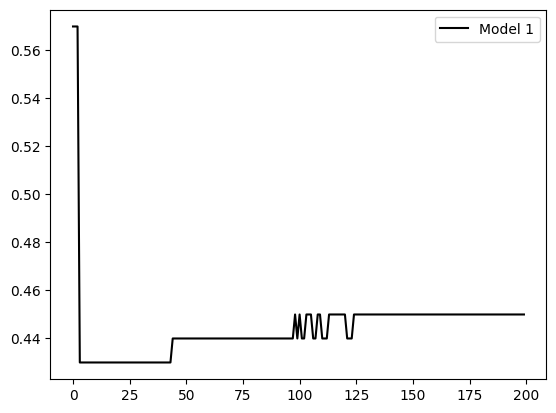

In [25]:
plt.plot(hist1.history['val_accuracy'],color='black',label='Model 1')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step


<Axes: >

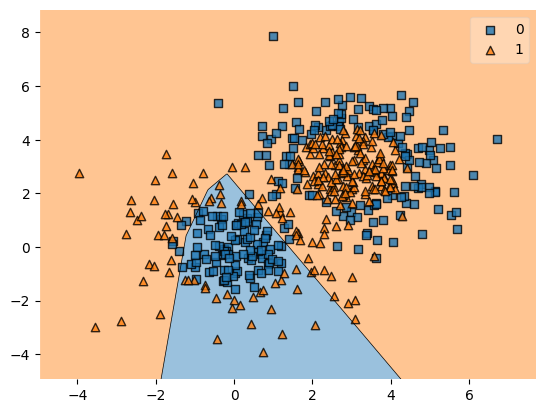

In [26]:
plot_decision_regions(X,y.astype(int),clf=m1)

In [27]:
m2 = Sequential()

m2.add(Dense(2,activation='relu',input_dim=2))
m2.add(BatchNormalization())
m2.add(Dense(2,activation='relu'))
m2.add(BatchNormalization())
m2.add(Dense(1,activation='sigmoid'))

m2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 2)                   │               8 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31 (124.00 B)

 Trainable params: 23 (92.00 B)

 Non-trainable params: 8 (32.00 B)

In [28]:
m2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
hist2 = m2.fit(X,y,epochs=200,verbose=0,validation_split=0.2)

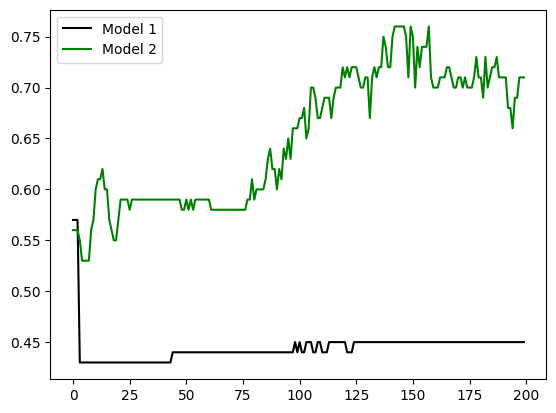

In [29]:
plt.plot(hist1.history['val_accuracy'],color='black',label='Model 1')
plt.plot(hist2.history['val_accuracy'],color='green',label='Model 2')
plt.legend()
plt.show()

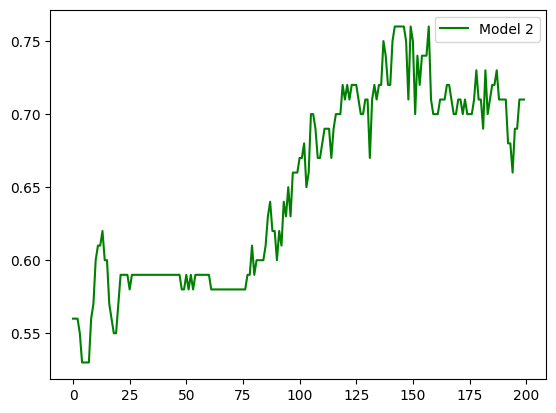

In [30]:
plt.plot(hist2.history['val_accuracy'],color='green',label='Model 2')
plt.legend()
plt.show()

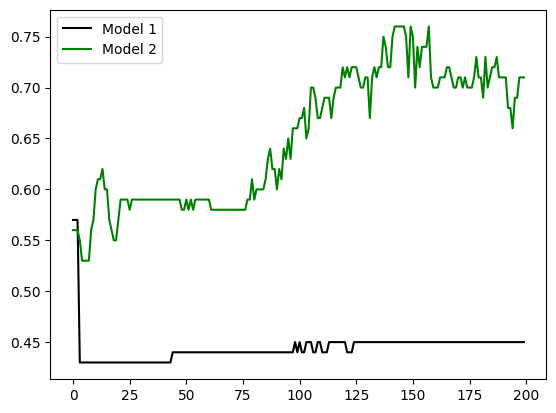

In [31]:
plt.plot(hist1.history['val_accuracy'],color='black',label='Model 1')
plt.plot(hist2.history['val_accuracy'],color='green',label='Model 2')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 13s 1ms/step


<Axes: >

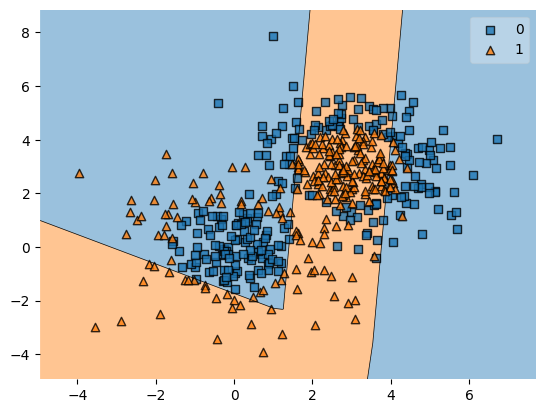

In [33]:
plot_decision_regions(X,y.astype(int),clf=m1)
plt.show()
plot_decision_regions(X,y.astype(int),clf=m2)
plt.show()

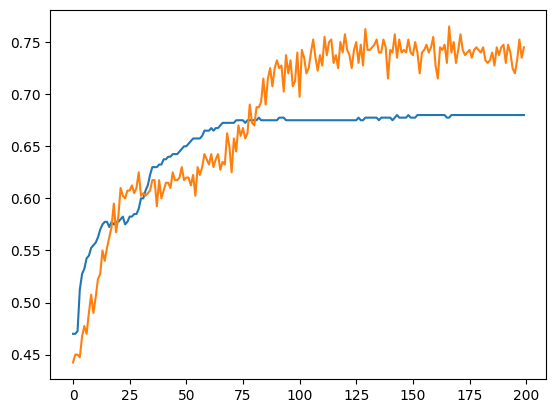

In [35]:
plt.plot(hist1.history['accuracy'])
plt.plot(hist2.history['accuracy'])